Fitbit data for one individual.  Looks like a he/she left it off from time to time.  Assuming sleep and work for monday through friday, 2/3 of the day is sedentary.  

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import itertools
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from fbprophet import Prophet
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

### Acquired fitbit data via acuire.py

In [46]:
df = acquire.get_fitbit_data()

In [47]:
df.shape

(225, 10)

### Rename columns to make them easier to use

In [48]:
df = df.rename(columns = {'Date':'date', 'Calories Burned':'calories_burned', 'Steps':'steps', 'Distance':'distance', 'Floors':'floors', 'Minutes Sedentary':'minutes_sedentary', 'Minutes Lightly Active':'minutes_lightly_active', 'Minutes Fairly Active':'minutes_fairly_active', 'Minutes Very Active':'minutes_very_active', 'Activity Calories':'activity_calories'})
df.head(1)

,date,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
date                      225 non-null object
calories_burned           225 non-null object
steps                     225 non-null object
distance                  225 non-null float64
floors                    225 non-null int64
minutes_sedentary         225 non-null object
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


### Change object types into floats

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
date                      225 non-null object
calories_burned           225 non-null object
steps                     225 non-null object
distance                  225 non-null float64
floors                    225 non-null int64
minutes_sedentary         225 non-null object
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


In [51]:
df.calories_burned = df.calories_burned.astype(str)
df.calories_burned = df.calories_burned.str.replace(',', '').astype(float)

df.minutes_sedentary = df.minutes_sedentary.astype(str)
df.minutes_sedentary = df.minutes_sedentary.str.replace(',', '').astype(float)

df.activity_calories = df.activity_calories.astype(str)
df.activity_calories = df.activity_calories.str.replace(',', '').astype(float)

df.steps = df.steps.astype(str)
df.steps = df.steps.str.replace(',', '').astype(float)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
date                      225 non-null object
calories_burned           225 non-null float64
steps                     225 non-null float64
distance                  225 non-null float64
floors                    225 non-null int64
minutes_sedentary         225 non-null float64
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 17.7+ KB


### Set column names to 'ds' and 'y' in order to feed into Prophet

In [252]:
df1 = df[['date', 'minutes_fairly_active']]
df1.columns = ['ds', 'y']

In [253]:
df1.head()

,ds,y
0,4/26/18,0
1,4/27/18,46
2,4/28/18,22
3,4/29/18,0
4,4/30/18,0


In [254]:
df1.ds = pd.to_datetime(df1.ds)
# df1 = df1.set_index(df1.ds).drop(columns='ds')

In [255]:
df1.head()

,ds,y
0,2018-04-26,0
1,2018-04-27,46
2,2018-04-28,22
3,2018-04-29,0
4,2018-04-30,0


In [256]:
len(df)

225

### Visualize data

In [257]:
# plt.plot('ds', 'y',data=df1)

### Split into Train and Test

In [258]:
train = df1.iloc[:211]
test = df1.iloc[211:]

### Create Prophet object, fit, and predict

In [259]:
m = Prophet()

m.fit(df1)

#Create a placeholder dataframe

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [229]:
forecast.tail(14)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
225,2018-12-07,71.641002,35.937062,115.916329,71.641002,71.641002,5.986497,5.986497,5.986497,5.986497,5.986497,5.986497,0.0,0.0,0.0,77.627500
226,2018-12-08,71.976110,40.814427,120.673594,71.976110,71.976110,8.391695,8.391695,8.391695,8.391695,8.391695,8.391695,0.0,0.0,0.0,80.367805
227,2018-12-09,72.311218,42.408461,119.045957,72.311216,72.311219,9.409984,9.409984,9.409984,9.409984,9.409984,9.409984,0.0,0.0,0.0,81.721202
228,2018-12-10,72.646325,27.667133,103.960679,72.646320,72.646331,-9.366635,-9.366635,-9.366635,-9.366635,-9.366635,-9.366635,0.0,0.0,0.0,63.279690
229,2018-12-11,72.981433,28.685034,104.899074,72.981423,72.981443,-5.952789,-5.952789,-5.952789,-5.952789,-5.952789,-5.952789,0.0,0.0,0.0,67.028644
230,2018-12-12,73.316541,27.875746,103.517254,73.316524,73.316555,-8.780011,-8.780011,-8.780011,-8.780011,-8.780011,-8.780011,0.0,0.0,0.0,64.536530
231,2018-12-13,73.651648,33.480953,111.927801,73.651624,73.651668,0.311259,0.311259,0.311259,0.311259,0.311259,0.311259,0.0,0.0,0.0,73.962907
232,2018-12-14,73.986756,42.937718,119.700352,73.986725,73.986783,5.986497,5.986497,5.986497,5.986497,5.986497,5.986497,0.0,0.0,0.0,79.973253
233,2018-12-15,74.321864,44.841489,122.265617,74.321825,74.321898,8.391695,8.391695,8.391695,8.391695,8.391695,8.391695,0.0,0.0,0.0,82.713558
234,2018-12-16,74.656971,42.581253,122.414298,74.656921,74.657014,9.409984,9.409984,9.409984,9.409984,9.409984,9.409984,0.0,0.0,0.0,84.066956


In [260]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [261]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(14)

,ds,yhat_lower,yhat_upper,yhat
225,2018-12-07,2.841944,38.595827,20.401854
226,2018-12-08,8.175089,45.462921,26.558063
227,2018-12-09,8.989528,46.339022,26.933087
228,2018-12-10,-1.606070,35.046338,16.214480
229,2018-12-11,-5.831365,32.088886,13.964514
230,2018-12-12,-3.527122,32.694601,14.995756
231,2018-12-13,-2.959799,34.422875,15.556116
232,2018-12-14,3.952118,38.949287,20.651342
233,2018-12-15,8.329957,44.654975,26.807550
234,2018-12-16,8.736140,43.878453,27.182574


### Validation:  Compare Predictions to Actual data with Root Mean Square Error

In [262]:
from statsmodels.tools.eval_measures import rmse

In [263]:
predictions = forecast.iloc[-14:]['yhat']

In [264]:
predictions

225    20.401854
226    26.558063
227    26.933087
228    16.214480
229    13.964514
230    14.995756
231    15.556116
232    20.651342
233    26.807550
234    27.182574
235    16.463967
236    14.214001
237    15.245244
238    15.805603
Name: yhat, dtype: float64

In [265]:
test.y

211    23
212    13
213     3
214    10
215    12
216     0
217    15
218    12
219    22
220    13
221    40
222    11
223    12
224     4
Name: y, dtype: int64

#### Calories Burned RMSE

In [111]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 411.4042643009861
Mean = y    3551.5
dtype: float64


#### Steps RMSE

In [130]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 3878.392290279098
Mean = y    12152.5
dtype: float64


#### Distance RMSE

In [149]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 1.8220916389728496
Mean = y    5.940714
dtype: float64


#### Floors RMSE

In [167]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 44.66243059470026
Mean = y    26.214286
dtype: float64


#### Minutes Sedentary RMSE

In [184]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 97.95218453375075
Mean = y    657.428571
dtype: float64


#### Minutes Lightly Active RMSE

In [202]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 31.524176908452564
Mean = y    236.071429
dtype: float64


#### Minutes Fairly Active RMSE

In [220]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 12.083954203895848
Mean = y    13.571429
dtype: float64


#### Minutes very Active RMSE

In [236]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 39.413032023100584
Mean = y    49.928571
dtype: float64


#### Activity Calories RMSE

In [250]:
# print(f'Root Mean Squared = {rmse(predictions, test.y)}')
# print(f'Mean = {test.mean()}')

Root Mean Squared = 475.6033820099179
Mean = y    1856.357143
dtype: float64


### Visualize Predictions vs True Test Data

#### Calories Burned Visualization

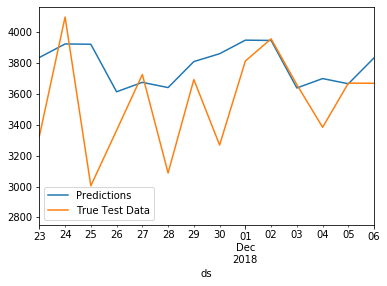

In [28]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))


#### Steps Visualization 

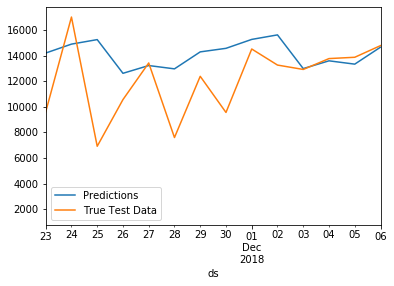

In [131]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))



#### Distance Visualization

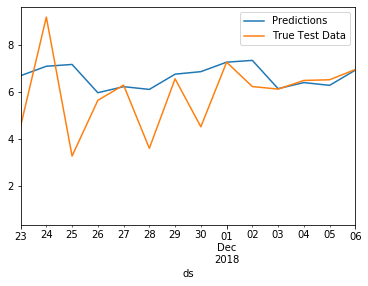

In [150]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))



#### Floors

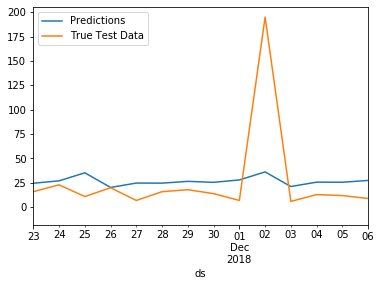

In [168]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))



#### Minutes Sedentary

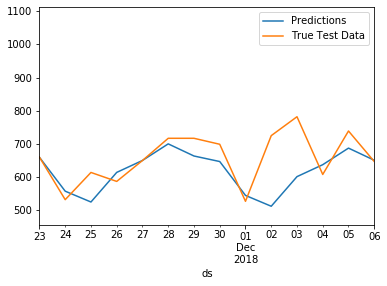

In [185]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))



#### Minutes Lightly Active

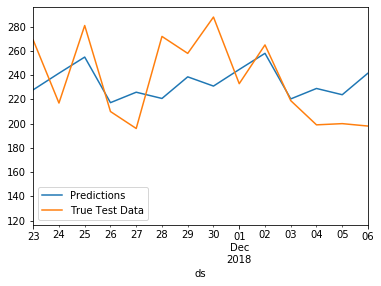

In [203]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))



#### Minutes Fairly Active

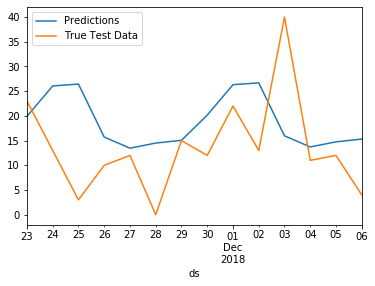

In [266]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))



#### Minutes Very Active

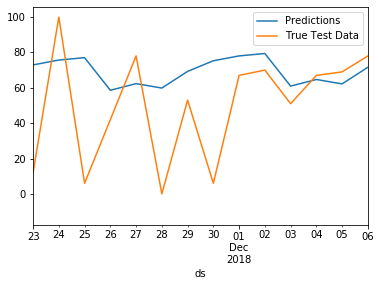

In [237]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))



#### Activity Calories

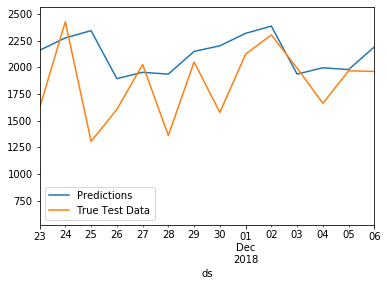

In [251]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))

